## Banka Kampanyasına Katılım Tahmini

Bu proje, bir bankanın telefon yoluyla gerçekleştirdiği pazarlama kampanyalarına müşterilerin katılıp katılmayacağını tahmin eden bir makine öğrenmesi modelidir.  
Veri seti, Portekiz’deki bir bankaya ait gerçek müşteri bilgilerini içermektedir. Amaç, müşterilerin demografik ve finansal özelliklerine dayanarak kampanyaya katılım durumlarını (mevduat ürünü alıp almadıklarını) tahmin etmektir.




##Kütüphaneleri Yükleme

In [47]:
import pandas as pd  # Veri işleme ve analiz için pandas kütüphanesi
import numpy as np # Sayısal işlemler için NumPy
import matplotlib.pyplot as plt # Grafik çizimi için matplotlib
import seaborn as sns # Görselleştirme için seaborn

##Veri Yükleme

In [48]:
from google.colab import files
uploaded = files.upload()

Saving bank.csv to bank (2).csv


## Keşifsel Veri Analizi (EDA)




Veri yapısı ve içerdiği sütunlar incelenmiştir. Bu adımlar, modelleme sürecinden önce verinin genel özelliklerini anlamak ve olası dengesizlikleri tespit etmek için gerçekleştirilmiştir.

In [49]:
df = pd.read_csv("bank.csv")
df.head() # Veri setinin ilk 5 satırını gösterir

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [50]:
df.shape # Veri setinde kaç satır ve sütun olduğunu gösterir

(11162, 17)

In [51]:
df.info() # Sütunların veri tiplerini ve eksik veri olup olmadığını gösterir

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [52]:
df.isnull().sum() # Eksik veri kontrolü (0'dan farklı olan sütunlarda eksik değer vardır)

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


In [53]:
df.describe() # Sayısal sütunların istatistiksel değerlerini verir

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [54]:
df.columns # Veri setinde hangi sütunlar olduğunu gösterir (özellik isimlerini listeler)

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

### Veri Görselleştirme

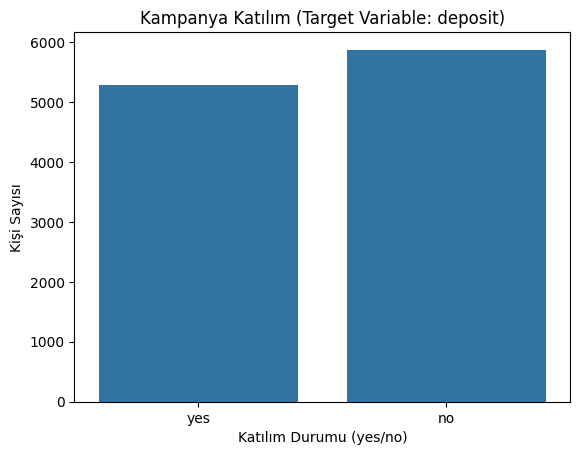

In [55]:
 import seaborn as sns
 import matplotlib.pyplot as plt

 sns.countplot(x="deposit", data=df) # Hedef değişkenin (katılım durumu) sınıf dağılımını çubuk grafik ile göster
 plt.title("Kampanya Katılım (Target Variable: deposit)") # Grafiğe başlık ekle
 plt.xlabel("Katılım Durumu (yes/no)") # X eksenine açıklama yaz
 plt.ylabel("Kişi Sayısı") # Y eksenine açıklama yaz
 plt.show() # Grafiği gösterir

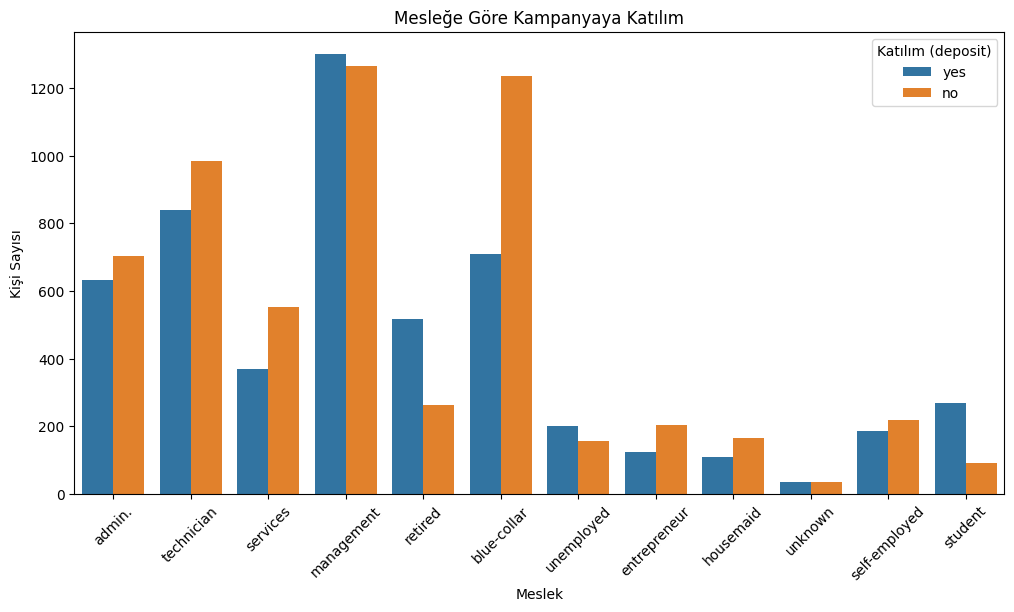

In [56]:
plt.figure(figsize=(12,6)) # Grafik boyutunu belirle
sns.countplot(x="job", hue="deposit", data=df) # Mesleğe göre, kampanyaya katılım durumunu çubuk grafikle göster
plt.title("Mesleğe Göre Kampanyaya Katılım") #Başlık
plt.xlabel("Meslek") #X ekseni
plt.ylabel("Kişi Sayısı") #Y ekseni
plt.xticks(rotation=45) #Meslek isimlerini yatay çevirmek için döndür
plt.legend(title="Katılım (deposit)") #Açıklama kutusu
plt.show() # Grafiği göster


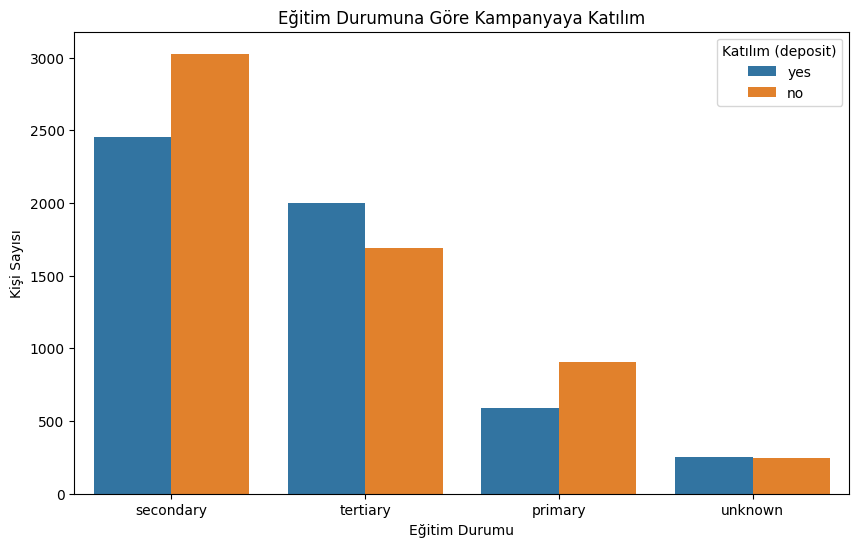

In [57]:
plt.figure(figsize=(10,6)) # Grafik boyutunu ayarla
sns.countplot(x="education", hue="deposit", data=df) # Eğitim durumuna göre kampanyaya katılımı göster
plt.title("Eğitim Durumuna Göre Kampanyaya Katılım")
plt.xlabel("Eğitim Durumu")
plt.ylabel("Kişi Sayısı")
plt.legend(title="Katılım (deposit)")
plt.show()


## Veri Ön İşleme

Model eğitimi öncesinde veri seti makine öğrenmesi algoritmalarına uygun hale getirilmiştir.Buradaki adımlar, verinin yapay zeka modeline girmesi ve doğru sonuçlar üretmesini sağlamak amacıyla yapılmıştır.


In [58]:
df["deposit"] = df["deposit"].map({"yes": 1, "no": 0}) # Hedef sütunu yes için 1, no için 0 olarak sayısal hale getir
df["deposit"].value_counts()  # Hedef değişkenin sınıf dağılımını göster (0 = katılmadı, 1 = katıldı)


,count
deposit,
0,5873
1,5289


In [59]:
df_encoded = pd.get_dummies(df, drop_first=True) # Kategorik sütunları 0-1 sütunlara ayırarak sayısallaştır, ilk sınıfı atlayarak (drop_first=True) multicollinearity engellenir
df_encoded.head() # One-hot encoding sonrası oluşan yeni veri setinin ilk 5 satırını göster


,age,balance,day,duration,campaign,pdays,previous,deposit,job_blue-collar,job_entrepreneur,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,59,2343,5,1042,1,-1,0,1,False,False,...,False,False,False,True,False,False,False,False,False,True
1,56,45,5,1467,1,-1,0,1,False,False,...,False,False,False,True,False,False,False,False,False,True
2,41,1270,5,1389,1,-1,0,1,False,False,...,False,False,False,True,False,False,False,False,False,True
3,55,2476,5,579,1,-1,0,1,False,False,...,False,False,False,True,False,False,False,False,False,True
4,54,184,5,673,2,-1,0,1,False,False,...,False,False,False,True,False,False,False,False,False,True


In [60]:
X = df_encoded.drop("deposit", axis=1) # Tüm özellikler (bağımsız değişkenler) (hedef sütun hariç)
y = df_encoded["deposit"] # Hedef değişken (bağımlı değişken) (kampanyaya katılım bilgisi)


In [61]:
from sklearn.model_selection import train_test_split # Veriyi eğitim ve test setlerine ayırmak için gerekli fonksiyon

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Verinin %20'si test için ayrılıyor
                                                                                          # Her çalıştırmada aynı sonuçları almak için sabit rastgelelik


In [62]:
print("X_train boyutu:", X_train.shape) # Eğitim verisinin boyutu (gözlem sayısı, özellik sayısı)
print("X_test boyutu:", X_test.shape) # Test verisinin boyutu
print("y_train sınıf dağılımı:") # Eğitim verisindeki hedef değişkenin (0 ve 1) dağılımı
print(y_train.value_counts()) # Kaç tane 0, kaç tane 1 olduğunu göster


X_train boyutu: (8929, 42)
X_test boyutu: (2233, 42)
y_train sınıf dağılımı:
deposit
0    4707
1    4222
Name: count, dtype: int64


## Modelleme: Karar Ağacı (Decision Tree Classifier)

Veri ön işleme adımlarının ardından, sınıflandırma algoritması olarak yorumlanabilirliği yüksek ve kolay uygulanabilir olması nedeniyle Karar Ağacı seçilmiştir.
Model; eğitim verisi ile eğitilmiş, test verisi üzerinde değerlendirilmiş,accuracy_score ve classification_report gibi metriklerle performansı analiz edilmiştir.




In [63]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42) #Modeli kur

model.fit(X_train, y_train) #Modeli eğit


DecisionTreeClassifier(random_state=42)

In [64]:
y_pred = model.predict(X_test) #Model tahmini


In [65]:
from sklearn.metrics import accuracy_score, classification_report # Başarı metrikleri için gerekli fonksiyonlar

print("Doğruluk Oranı:", accuracy_score(y_test, y_pred)) # Test verisine göre tahminlerin doğruluk oranı (accuracy)
print("\nSınıflandırma Raporu:\n", classification_report(y_test, y_pred)) # Precision, recall ve F1-score gibi detaylı metrikleri göster


Doğruluk Oranı: 0.7895208240035826

Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       0.79      0.80      0.80      1166
           1       0.78      0.77      0.78      1067

    accuracy                           0.79      2233
   macro avg       0.79      0.79      0.79      2233
weighted avg       0.79      0.79      0.79      2233



#Karar Ağacı Görselleştirmesi

In [66]:
from sklearn.tree import plot_tree # Karar ağacını görselleştirmek için fonksiyon
import matplotlib.pyplot as plt


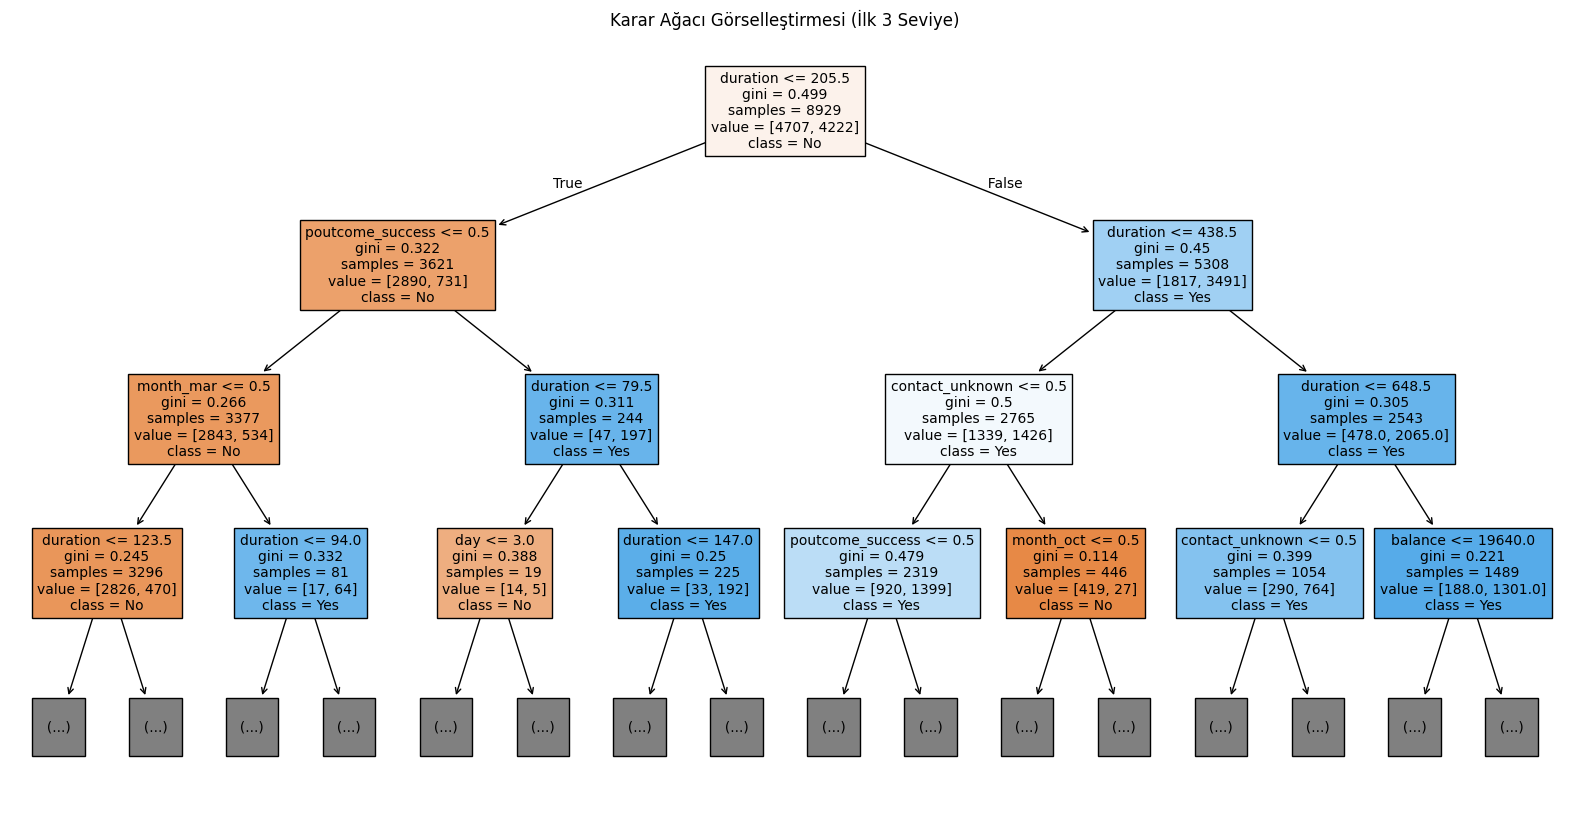

In [67]:
plt.figure(figsize=(20,10)) # Grafik boyutunu ayarla
plot_tree(model, filled=True, feature_names=X.columns, class_names=["No", "Yes"], max_depth=3, fontsize=10) #Eğitilmiş karar ağacı modelin oluşumu
plt.title("Karar Ağacı Görselleştirmesi (İlk 3 Seviye)") #Başlık
plt.show() #Grafiği çiz


### Karar Ağacının İlk Karar Noktası Yorumu

Modelin görselleştirilen karar ağacında, ilk ayrım noktası `duration` (çağrı süresi) değişkenine aittir. Bu, modelin karar verirken en çok dikkate aldığı özelliğin çağrı süresi olduğunu göstermektedir.

Örneğin, modelin ilk düğümüne bakarsak çağrı süresi 210 saniyeden kısa ise, müşterilerin kampanyaya katılmama ihtimali yüksektir. Süre uzadıkça katılım olasılığı artmaktadır.




## Sonuç ve Yorum
Bu projede geliştirilen karar ağacı modeli, bankacılık sektöründeki bir pazarlama kampanyasına müşteri katılımını tahmin etmede başarılı sonuçlar üretmiştir.
Model yaklaşık %79 doğruluk oranına ulaşmıştır.  
Her iki sınıf için de (kampanyaya katılan ve katılmayan) precision, recall ve F1-score değerleri dengelidir.
Bu oran, gerçek hayattaki veri dağılımlarını dikkate aldığımızda başarılı kabul edilebilir. Çünkü bu tür sınıflandırma problemlerinde %90'ın üzerindeki doğruluk değerleri genellikle overfitting (aşırı öğrenme) riski taşır ya da yapay veri içerir.

